In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
#Importing dataset
##Metallic Dataset
df=pd.read_csv("Stock_ALIR1(Metallic).csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1535 non-null   int64  
 1   <TICKER>      1535 non-null   object 
 2   <DTYYYYMMDD>  1535 non-null   int64  
 3   <FIRST>       1535 non-null   float64
 4   <HIGH>        1535 non-null   float64
 5   <LOW>         1535 non-null   float64
 6   <CLOSE>       1535 non-null   float64
 7   <VALUE>       1535 non-null   int64  
 8   <VOL>         1535 non-null   int64  
 9   <OPENINT>     1535 non-null   int64  
 10  <PER>         1535 non-null   object 
 11  <OPEN>        1535 non-null   float64
 12  <LAST>        1535 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 156.0+ KB


In [30]:
df.head()

,Unnamed: 0,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
0,0,S*Iran.Aluminium,20021221,1700.0,1700.0,1700.0,1700.0,1700000,1000,1,D,1700.0,1700.0
1,1,S*Iran.Aluminium,20030318,5600.0,5600.0,5600.0,5600.0,919497420800,164195968,1,D,1700.0,5600.0
2,2,S*Iran.Aluminium,20030331,5320.0,5320.0,5320.0,5320.0,5320000,1000,1,D,5600.0,5320.0
3,3,S*Iran.Aluminium,20030421,5054.0,5054.0,5054.0,5054.0,4472790,885,5,D,5320.0,5054.0
4,4,S*Iran.Aluminium,20040106,1101.0,1101.0,1101.0,1101.0,974385,885,5,D,5054.0,1101.0


In [93]:
#Exploratory Data Analysis
df.describe()

,Unnamed: 0,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<OPEN>,<LAST>
count,1535.000000,1.535000e+03,1535.000000,1535.000000,1535.000000,1535.000000,1.535000e+03,1.535000e+03,1535.000000,1535.000000,1535.000000
mean,767.000000,2.014569e+07,7486.581759,7582.163518,7360.582410,7482.254072,1.932278e+10,4.098205e+06,502.579153,7455.385668,7469.728339
std,443.260646,4.159811e+04,4607.126002,4651.190635,4556.411491,4614.527475,4.988563e+10,1.054633e+07,740.133437,4586.153272,4608.472271
min,0.000000,2.002122e+07,818.000000,842.000000,818.000000,855.000000,9.227000e+03,1.000000e+00,1.000000,330.000000,842.000000
25%,383.500000,2.012071e+07,4080.000000,4149.000000,3993.000000,4061.000000,9.286925e+08,1.187995e+05,41.000000,4056.000000,4072.500000
50%,767.000000,2.015041e+07,6751.000000,6821.000000,6631.000000,6711.000000,4.514713e+09,8.766660e+05,202.000000,6709.000000,6710.000000
75%,1150.500000,2.018101e+07,11000.000000,11261.000000,10788.500000,11096.000000,1.756796e+10,4.207862e+06,674.500000,11071.500000,11097.500000
max,1534.000000,2.020060e+07,25800.000000,25800.000000,25291.000000,25291.000000,9.482221e+11,1.641960e+08,5703.000000,25291.000000,25291.000000


C:\Users\win-10\AppData\Local\Temp\ipykernel_23396\1299679439.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = sns.heatmap(df.corr(), annot = True)


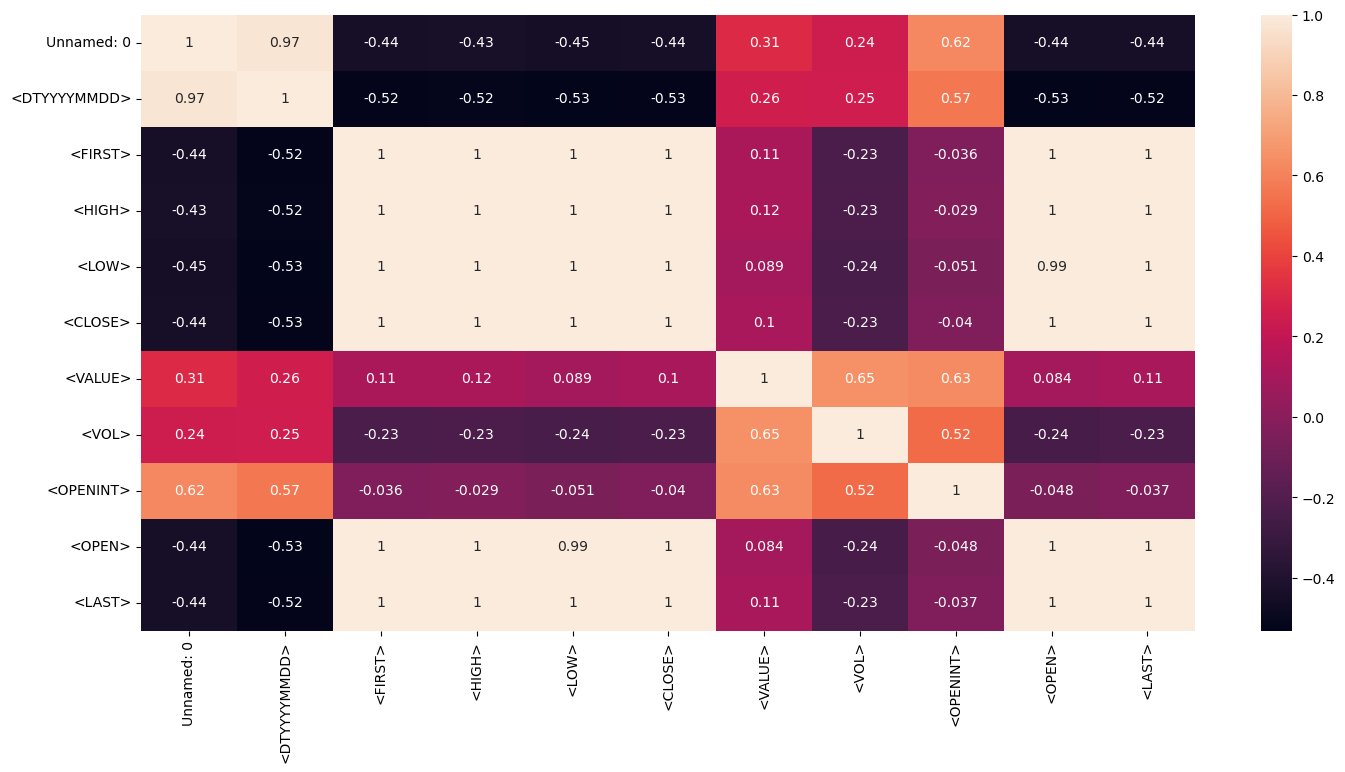

In [94]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(df.corr(), annot = True)

In [95]:
df['datetime'] = pd.to_datetime(df['<DTYYYYMMDD>'], format='%Y%m%d')
df.index = df['datetime']
df.dropna()
df_new = df[["<FIRST>","<HIGH>","<LOW>","<CLOSE>","<VALUE>","<VOL>"]]
df_new.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>
datetime,,,,,,
2002-12-21,1700.0,1700.0,1700.0,1700.0,1700000,1000
2003-03-18,5600.0,5600.0,5600.0,5600.0,919497420800,164195968
2003-03-31,5320.0,5320.0,5320.0,5320.0,5320000,1000
2003-04-21,5054.0,5054.0,5054.0,5054.0,4472790,885
2004-01-06,1101.0,1101.0,1101.0,1101.0,974385,885


In [96]:
df_new.shape

(1535, 6)

In [97]:
#Calculating the change in price
df_new['change_in_price'] = df_new['<CLOSE>'].diff()

C:\Users\win-10\AppData\Local\Temp\ipykernel_23396\1803974385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['change_in_price'] = df_new['<CLOSE>'].diff()


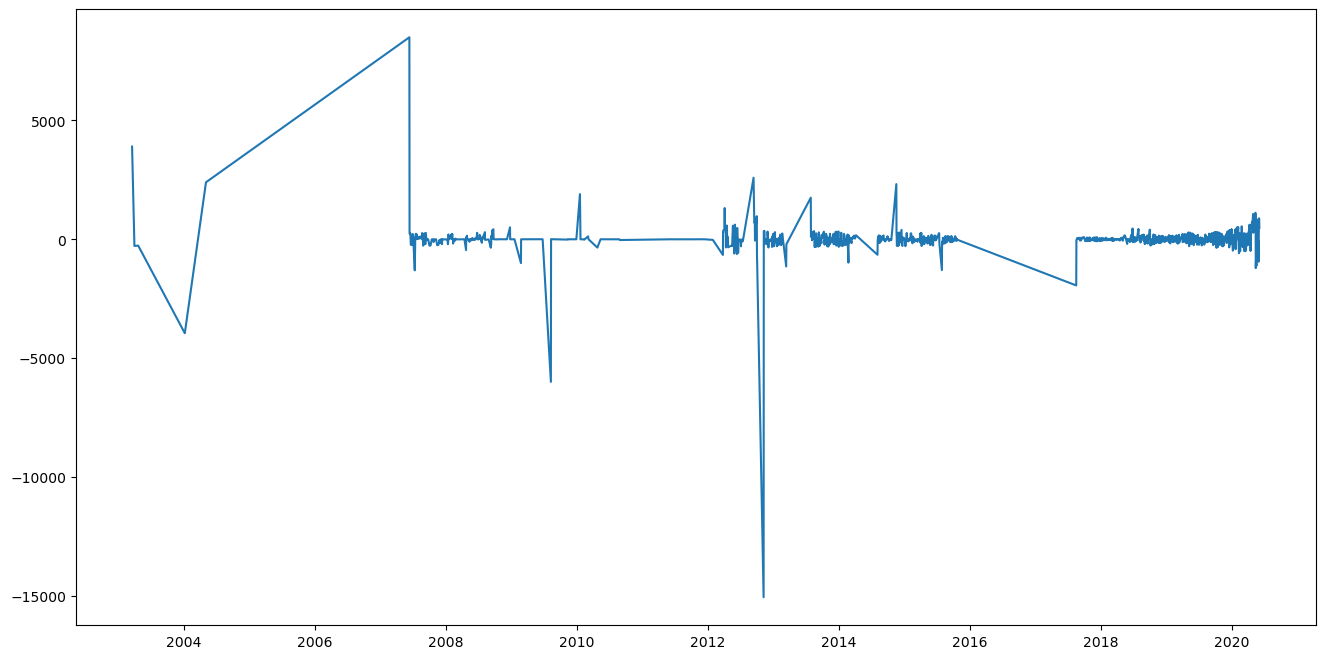

In [98]:
#Data visualisation
plt.figure(figsize=(16,8))
plt.plot(df_new['change_in_price'], label='Change In Price')

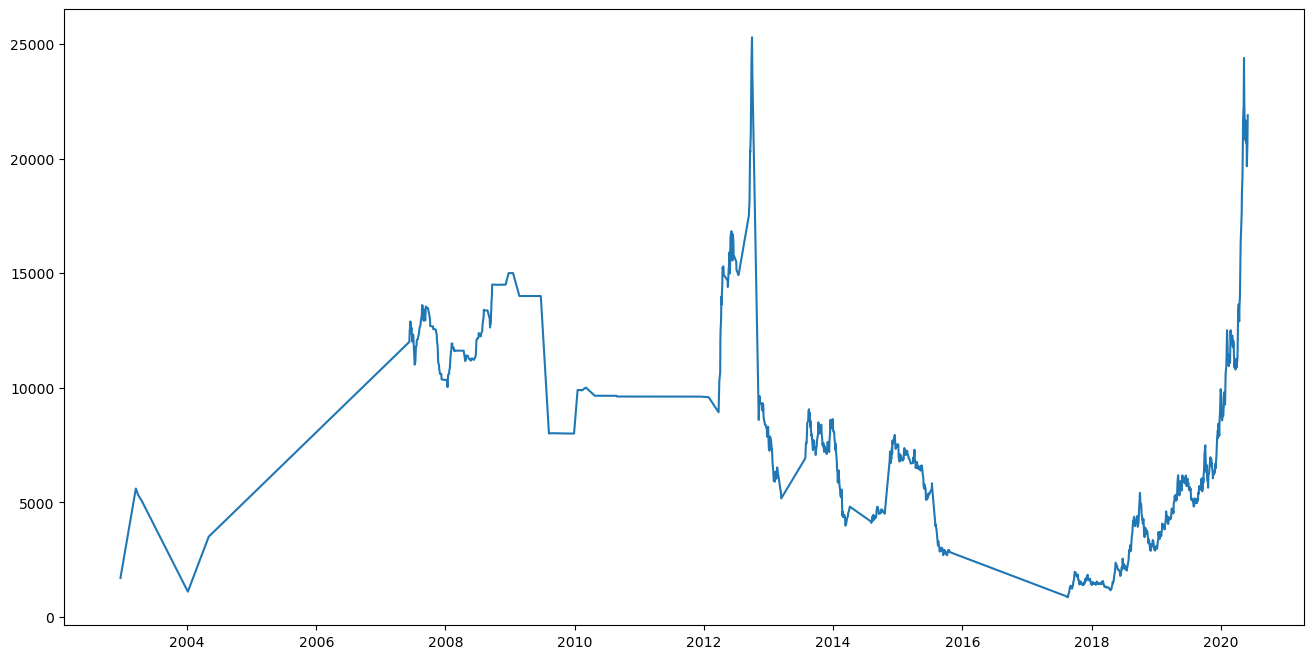

In [99]:
plt.figure(figsize=(16,8))
plt.plot(df_new['<CLOSE>'], label='Close Price history')

In [100]:
#1. Simple n day moving average
#A moving average (MA) is a widely used technical indicator that smooths out price trends by filtering out the “noise” from random short-term price fluctuations.
##The most common applications of moving averages are to identify trend direction and to determine support and resistance levels.
def moving_average(df, n):
    """Calculate the moving average for the given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    MA = pd.Series(df['<CLOSE>'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    df = df.join(MA)
    return df
df_new = moving_average(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10
datetime,,,,,,,,
2020-05-26,19641.0,19780.0,19641.0,20610.0,3734971842,190162,-64.0,21721.6
2020-05-27,19563.0,20458.0,19563.0,19664.0,88787842465,4515291,-946.0,21249.2
2020-05-30,19670.0,20647.0,19670.0,20548.0,61764520298,3005837,884.0,20986.5
2020-05-31,21200.0,21575.0,20954.0,21415.0,142517849008,6654898,867.0,20902.5
2020-06-01,22485.0,22485.0,22485.0,21891.0,25459832955,1132303,476.0,20977.3


In [101]:
#2. Weighted Moving Average (WMA)
def weighted_moving_average(df, n):
    """
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    WMA = pd.Series(df['<CLOSE>'].ewm(span=n, min_periods=n).mean(), name='WMA_' + str(n))
    df = df.join(WMA)
    return df
df_new = weighted_moving_average(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10
datetime,,,,,,,,,
2020-05-26,19641.0,19780.0,19641.0,20610.0,3734971842,190162,-64.0,21721.6,21117.191748
2020-05-27,19563.0,20458.0,19563.0,19664.0,88787842465,4515291,-946.0,21249.2,20852.975067
2020-05-30,19670.0,20647.0,19670.0,20548.0,61764520298,3005837,884.0,20986.5,20797.525054
2020-05-31,21200.0,21575.0,20954.0,21415.0,142517849008,6654898,867.0,20902.5,20909.793226
2020-06-01,22485.0,22485.0,22485.0,21891.0,25459832955,1132303,476.0,20977.3,21088.194458


In [102]:
#3. Momentum
def momentum(df, n):
    """
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    M = pd.Series(df['<CLOSE>'].diff(n), name='MOM_' + str(n))
    df = df.join(M)
    return df
df_new = momentum(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10
datetime,,,,,,,,,,
2020-05-26,19641.0,19780.0,19641.0,20610.0,3734971842,190162,-64.0,21721.6,21117.191748,-2866.0
2020-05-27,19563.0,20458.0,19563.0,19664.0,88787842465,4515291,-946.0,21249.2,20852.975067,-4724.0
2020-05-30,19670.0,20647.0,19670.0,20548.0,61764520298,3005837,884.0,20986.5,20797.525054,-2627.0
2020-05-31,21200.0,21575.0,20954.0,21415.0,142517849008,6654898,867.0,20902.5,20909.793226,-840.0
2020-06-01,22485.0,22485.0,22485.0,21891.0,25459832955,1132303,476.0,20977.3,21088.194458,748.0


In [103]:
#4. Stochastic K%
def stochastic_oscillator_k(df):
    """Calculate stochastic oscillator %K for given data.
    :param df: pandas.DataFrame
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['<CLOSE>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']), name='SO_k')
    df = df.join(SOk)
    return df
df_new = stochastic_oscillator_k(df_new)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k
datetime,,,,,,,,,,,
2020-05-26,19641.0,19780.0,19641.0,20610.0,3734971842,190162,-64.0,21721.6,21117.191748,-2866.0,6.971223
2020-05-27,19563.0,20458.0,19563.0,19664.0,88787842465,4515291,-946.0,21249.2,20852.975067,-4724.0,0.112849
2020-05-30,19670.0,20647.0,19670.0,20548.0,61764520298,3005837,884.0,20986.5,20797.525054,-2627.0,0.898669
2020-05-31,21200.0,21575.0,20954.0,21415.0,142517849008,6654898,867.0,20902.5,20909.793226,-840.0,0.742351
2020-06-01,22485.0,22485.0,22485.0,21891.0,25459832955,1132303,476.0,20977.3,21088.194458,748.0,-inf


In [104]:
#5. Stochastic D%
def stochastic_oscillator_d(df, n):
    """Calculate stochastic oscillator %D for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['<CLOSE>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']), name='SO%k')
    SOd = pd.Series(SOk.ewm(span=n, min_periods=n).mean(), name='SO_' + str(n))
    df = df.join(SOd)
    return df
df_new = stochastic_oscillator_d(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10
datetime,,,,,,,,,,,,
2020-05-26,19641.0,19780.0,19641.0,20610.0,3734971842,190162,-64.0,21721.6,21117.191748,-2866.0,6.971223,2.342540
2020-05-27,19563.0,20458.0,19563.0,19664.0,88787842465,4515291,-946.0,21249.2,20852.975067,-4724.0,0.112849,1.803912
2020-05-30,19670.0,20647.0,19670.0,20548.0,61764520298,3005837,884.0,20986.5,20797.525054,-2627.0,0.898669,1.597562
2020-05-31,21200.0,21575.0,20954.0,21415.0,142517849008,6654898,867.0,20902.5,20909.793226,-840.0,0.742351,1.411213
2020-06-01,22485.0,22485.0,22485.0,21891.0,25459832955,1132303,476.0,20977.3,21088.194458,748.0,-inf,1.411213


In [105]:
#6. Relative Strength Index
#Error
"""
def relative_strength_index(df, n):
    Calculate Relative Strength Index(RSI) for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    i = df.index[0]
    UpI = [0]
    DoI = [0]
    while i + 1 <= df.index[-1]:
        UpMove = float(df.loc[i + 1, 'high']) - float(df.loc[i, 'high'])
        DoMove = float(df.loc[i, 'low']) - float(df.loc[i + 1, 'low'])
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.Series(UpI)

    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())

    # rsi = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
    rsi = pd.DataFrame(PosDI / (PosDI + NegDI), columns=['RSI_' + str(n)])
    rsi = rsi.set_index(df.index)
    df = df.join(rsi)
    return df
"""

"\ndef relative_strength_index(df, n):\n    Calculate Relative Strength Index(RSI) for given data.\n    :param df: pandas.DataFrame\n    :param n:\n    :return: pandas.DataFrame\n    i = df.index[0]\n    UpI = [0]\n    DoI = [0]\n    while i + 1 <= df.index[-1]:\n        UpMove = float(df.loc[i + 1, 'high']) - float(df.loc[i, 'high'])\n        DoMove = float(df.loc[i, 'low']) - float(df.loc[i + 1, 'low'])\n        if UpMove > DoMove and UpMove > 0:\n            UpD = UpMove\n        else:\n            UpD = 0\n        UpI.append(UpD)\n        if DoMove > UpMove and DoMove > 0:\n            DoD = DoMove\n        else:\n            DoD = 0\n        DoI.append(DoD)\n        i = i + 1\n    UpI = pd.Series(UpI)\n\n    DoI = pd.Series(DoI)\n    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())\n    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())\n\n    # rsi = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))\n    rsi = pd.DataFrame(PosDI / (PosDI + NegDI), columns=['R

In [106]:
#7. Signal
def macd(df, n_fast, n_slow):
    """Calculate MACD, MACD Signal and MACD difference
    :param df: pandas.DataFrame
    :param n_fast:
    :param n_slow:
    :return: pandas.DataFrame
    """
    EMAfast = pd.Series(df['<CLOSE>'].ewm(span=n_fast, min_periods=n_slow).mean())
    EMAslow = pd.Series(df['<CLOSE>'].ewm(span=n_slow, min_periods=n_slow).mean())
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods=9).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    df = df.join(MACD)
    df = df.join(MACDsign)
    df = df.join(MACDdiff)
    return df
df_new = macd(df_new,12,26)
df_new.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26
datetime,,,,,,,,,,,,,,,
2002-12-21,1700.0,1700.0,1700.0,1700.0,1700000,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-18,5600.0,5600.0,5600.0,5600.0,919497420800,164195968,3900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-31,5320.0,5320.0,5320.0,5320.0,5320000,1000,-280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-21,5054.0,5054.0,5054.0,5054.0,4472790,885,-266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-06,1101.0,1101.0,1101.0,1101.0,974385,885,-3953.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
#8. Larry Williams R%
#lEFT

In [108]:
#9. Accumulation / Distribution
def accumulation_distribution(df, n):
    """Calculate Accumulation/Distribution for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    ad = (2 * df['<CLOSE>'] - df['<HIGH>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']) * df['<VOL>']
    M = ad.diff(n - 1)
    N = ad.shift(n - 1)
    ROC = M / N
    AD = pd.Series(ROC, name='Acc/Dist_ROC_' + str(n))
    df = df.join(AD)
    return df
df_new = accumulation_distribution(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10
datetime,,,,,,,,,,,,,,,,
2020-05-26,19641.0,19780.0,19641.0,20610.0,3734971842,190162,-64.0,21721.6,21117.191748,-2866.0,6.971223,2.342540,1527.015046,1984.396206,-457.381160,-0.78324
2020-05-27,19563.0,20458.0,19563.0,19664.0,88787842465,4515291,-946.0,21249.2,20852.975067,-4724.0,0.112849,1.803912,1305.858238,1848.688612,-542.830375,NaN
2020-05-30,19670.0,20647.0,19670.0,20548.0,61764520298,3005837,884.0,20986.5,20797.525054,-2627.0,0.898669,1.597562,1188.224178,1716.595725,-528.371548,-1.25061
2020-05-31,21200.0,21575.0,20954.0,21415.0,142517849008,6654898,867.0,20902.5,20909.793226,-840.0,0.742351,1.411213,1151.682117,1603.613004,-451.930887,NaN
2020-06-01,22485.0,22485.0,22485.0,21891.0,25459832955,1132303,476.0,20977.3,21088.194458,748.0,-inf,1.411213,1147.899225,1512.470248,-364.571023,inf


In [109]:
#10. Commodity Channel Index
def commodity_channel_index(df, n):
    """Calculate Commodity Channel Index for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    PP = (df['<HIGH>'] + df['<LOW>'] + df['<CLOSE>']) / 3
    CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(),
                    name='CCI_' + str(n))
    df = df.join(CCI)
    return df
df_new = commodity_channel_index(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,,,,,,,,
2020-05-26,19641.0,19780.0,19641.0,20610.0,3734971842,190162,-64.0,21721.6,21117.191748,-2866.0,6.971223,2.342540,1527.015046,1984.396206,-457.381160,-0.78324,-1.217732
2020-05-27,19563.0,20458.0,19563.0,19664.0,88787842465,4515291,-946.0,21249.2,20852.975067,-4724.0,0.112849,1.803912,1305.858238,1848.688612,-542.830375,NaN,-1.155010
2020-05-30,19670.0,20647.0,19670.0,20548.0,61764520298,3005837,884.0,20986.5,20797.525054,-2627.0,0.898669,1.597562,1188.224178,1716.595725,-528.371548,-1.25061,-0.678315
2020-05-31,21200.0,21575.0,20954.0,21415.0,142517849008,6654898,867.0,20902.5,20909.793226,-840.0,0.742351,1.411213,1151.682117,1603.613004,-451.930887,NaN,0.851461
2020-06-01,22485.0,22485.0,22485.0,21891.0,25459832955,1132303,476.0,20977.3,21088.194458,748.0,-inf,1.411213,1147.899225,1512.470248,-364.571023,inf,1.748851


In [110]:
df_new.mean()

<FIRST>            7.486582e+03
<HIGH>             7.582164e+03
<LOW>              7.360582e+03
<CLOSE>            7.482254e+03
<VALUE>            1.932278e+10
<VOL>              4.098205e+06
change_in_price    1.316232e+01
MA_10              7.450139e+03
WMA_10             7.451169e+03
MOM_10             9.052459e+01
SO_k                        NaN
SO_10              6.141745e-01
MACD_12_26         3.693981e+01
MACDsign_12_26     3.224326e+01
MACDdiff_12_26     3.196668e+00
Acc/Dist_ROC_10             NaN
CCI_10             4.717750e-02
dtype: float64

In [111]:
df_new.min()

<FIRST>            8.180000e+02
<HIGH>             8.420000e+02
<LOW>              8.180000e+02
<CLOSE>            8.550000e+02
<VALUE>            9.227000e+03
<VOL>              1.000000e+00
change_in_price   -1.506400e+04
MA_10              9.684000e+02
WMA_10             1.217622e+03
MOM_10            -1.596700e+04
SO_k                       -inf
SO_10             -1.802383e+01
MACD_12_26        -2.474898e+03
MACDsign_12_26    -2.125425e+03
MACDdiff_12_26    -1.717115e+03
Acc/Dist_ROC_10            -inf
CCI_10            -2.846050e+00
dtype: float64

In [112]:
df_new.max()

<FIRST>            2.580000e+04
<HIGH>             2.580000e+04
<LOW>              2.529100e+04
<CLOSE>            2.529100e+04
<VALUE>            9.482221e+11
<VOL>              1.641960e+08
change_in_price    8.500000e+03
MA_10              2.278450e+04
WMA_10             2.269231e+04
MOM_10             1.136500e+04
SO_k                        inf
SO_10              2.527386e+01
MACD_12_26         2.799053e+03
MACDsign_12_26     2.404355e+03
MACDdiff_12_26     7.204539e+02
Acc/Dist_ROC_10             inf
CCI_10             2.846042e+00
dtype: float64

In [113]:
df_new.std()

<FIRST>            4.607126e+03
<HIGH>             4.651191e+03
<LOW>              4.556411e+03
<CLOSE>            4.614527e+03
<VALUE>            4.988563e+10
<VOL>              1.054633e+07
change_in_price    5.506471e+02
MA_10              4.507023e+03
WMA_10             4.481562e+03
MOM_10             1.749103e+03
SO_k                        NaN
SO_10              2.554240e+00
MACD_12_26         5.376527e+02
MACDsign_12_26     4.959767e+02
MACDdiff_12_26     1.756331e+02
Acc/Dist_ROC_10             NaN
CCI_10             1.266113e+00
dtype: float64

In [115]:
#Normalizing Data...........
data = (df_new - df_new.mean()) / (df_new.max() - df_new.min())
data.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,,,,,,,,
2020-05-26,0.486527,0.488735,0.501795,0.537230,-0.016439,-0.023801,-0.003275,0.654171,0.636378,-0.108171,NaN,0.039918,0.282535,0.430960,-0.188950,NaN,-0.222222
2020-05-27,0.483405,0.515900,0.498607,0.498516,0.073258,0.002540,-0.040705,0.632517,0.624074,-0.176150,NaN,0.027478,0.240601,0.401001,-0.224005,NaN,-0.211203
2020-05-30,0.487688,0.523473,0.502980,0.534692,0.044759,-0.006653,0.036956,0.620476,0.621492,-0.099426,NaN,0.022712,0.218296,0.371840,-0.218073,NaN,-0.127456
2020-05-31,0.548932,0.560655,0.555445,0.570173,0.129922,0.015571,0.036235,0.616625,0.626720,-0.034045,NaN,0.018408,0.211368,0.346898,-0.186714,NaN,0.141298
2020-06-01,0.600369,0.597117,0.618004,0.589652,0.006472,-0.018063,0.019642,0.620054,0.635028,0.024055,NaN,0.018408,0.210650,0.326777,-0.150875,NaN,0.298954


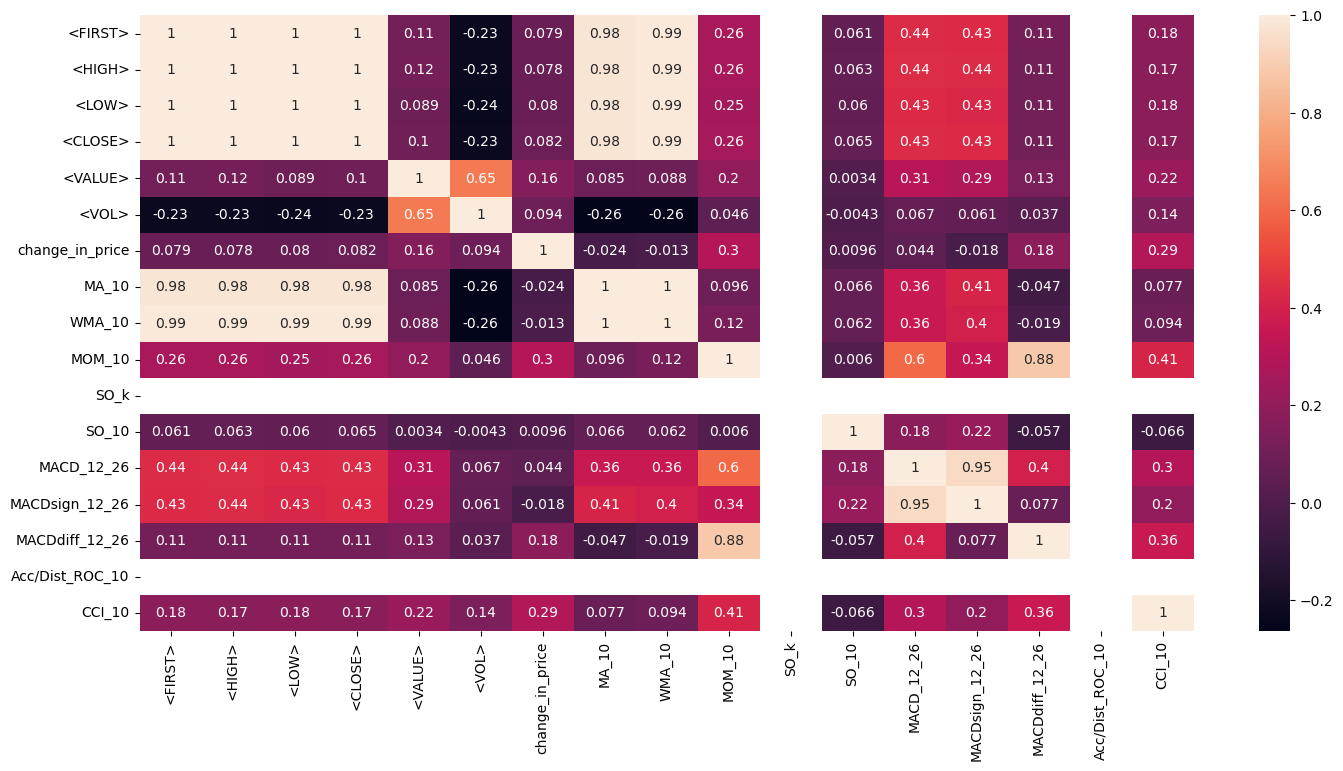

In [116]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [117]:
#To check null values
data.isnull().sum()

<FIRST>               0
<HIGH>                0
<LOW>                 0
<CLOSE>               0
<VALUE>               0
<VOL>                 0
change_in_price       1
MA_10                 9
WMA_10                9
MOM_10               10
SO_k               1535
SO_10                18
MACD_12_26           25
MACDsign_12_26       33
MACDdiff_12_26       33
Acc/Dist_ROC_10    1535
CCI_10               25
dtype: int64

In [118]:
#Removing the null values
data = data.fillna(data.mean())

In [119]:
data = data.dropna(how="all",axis=1)

In [120]:
##Defining the features and labels
X = data.iloc[:,7:]
X.tail()

,MA_10,WMA_10,MOM_10,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,CCI_10
datetime,,,,,,,,
2020-05-26,0.654171,0.636378,-0.108171,0.039918,0.282535,0.430960,-0.188950,-0.222222
2020-05-27,0.632517,0.624074,-0.176150,0.027478,0.240601,0.401001,-0.224005,-0.211203
2020-05-30,0.620476,0.621492,-0.099426,0.022712,0.218296,0.371840,-0.218073,-0.127456
2020-05-31,0.616625,0.626720,-0.034045,0.018408,0.211368,0.346898,-0.186714,0.141298
2020-06-01,0.620054,0.635028,0.024055,0.018408,0.210650,0.326777,-0.150875,0.298954


In [121]:
Y = data.iloc[:,3]
Y.tail()

datetime
2020-05-26    0.537230
2020-05-27    0.498516
2020-05-30    0.534692
2020-05-31    0.570173
2020-06-01    0.589652
Name: <CLOSE>, dtype: float64

In [122]:
X.isnull().sum()

MA_10             0
WMA_10            0
MOM_10            0
SO_10             0
MACD_12_26        0
MACDsign_12_26    0
MACDdiff_12_26    0
CCI_10            0
dtype: int64

array([[<Axes: title={'center': 'MA_10'}>,
        <Axes: title={'center': 'WMA_10'}>,
        <Axes: title={'center': 'MOM_10'}>],
       [<Axes: title={'center': 'SO_10'}>,
        <Axes: title={'center': 'MACD_12_26'}>,
        <Axes: title={'center': 'MACDsign_12_26'}>],
       [<Axes: title={'center': 'MACDdiff_12_26'}>,
        <Axes: title={'center': 'CCI_10'}>, <Axes: >]], dtype=object)

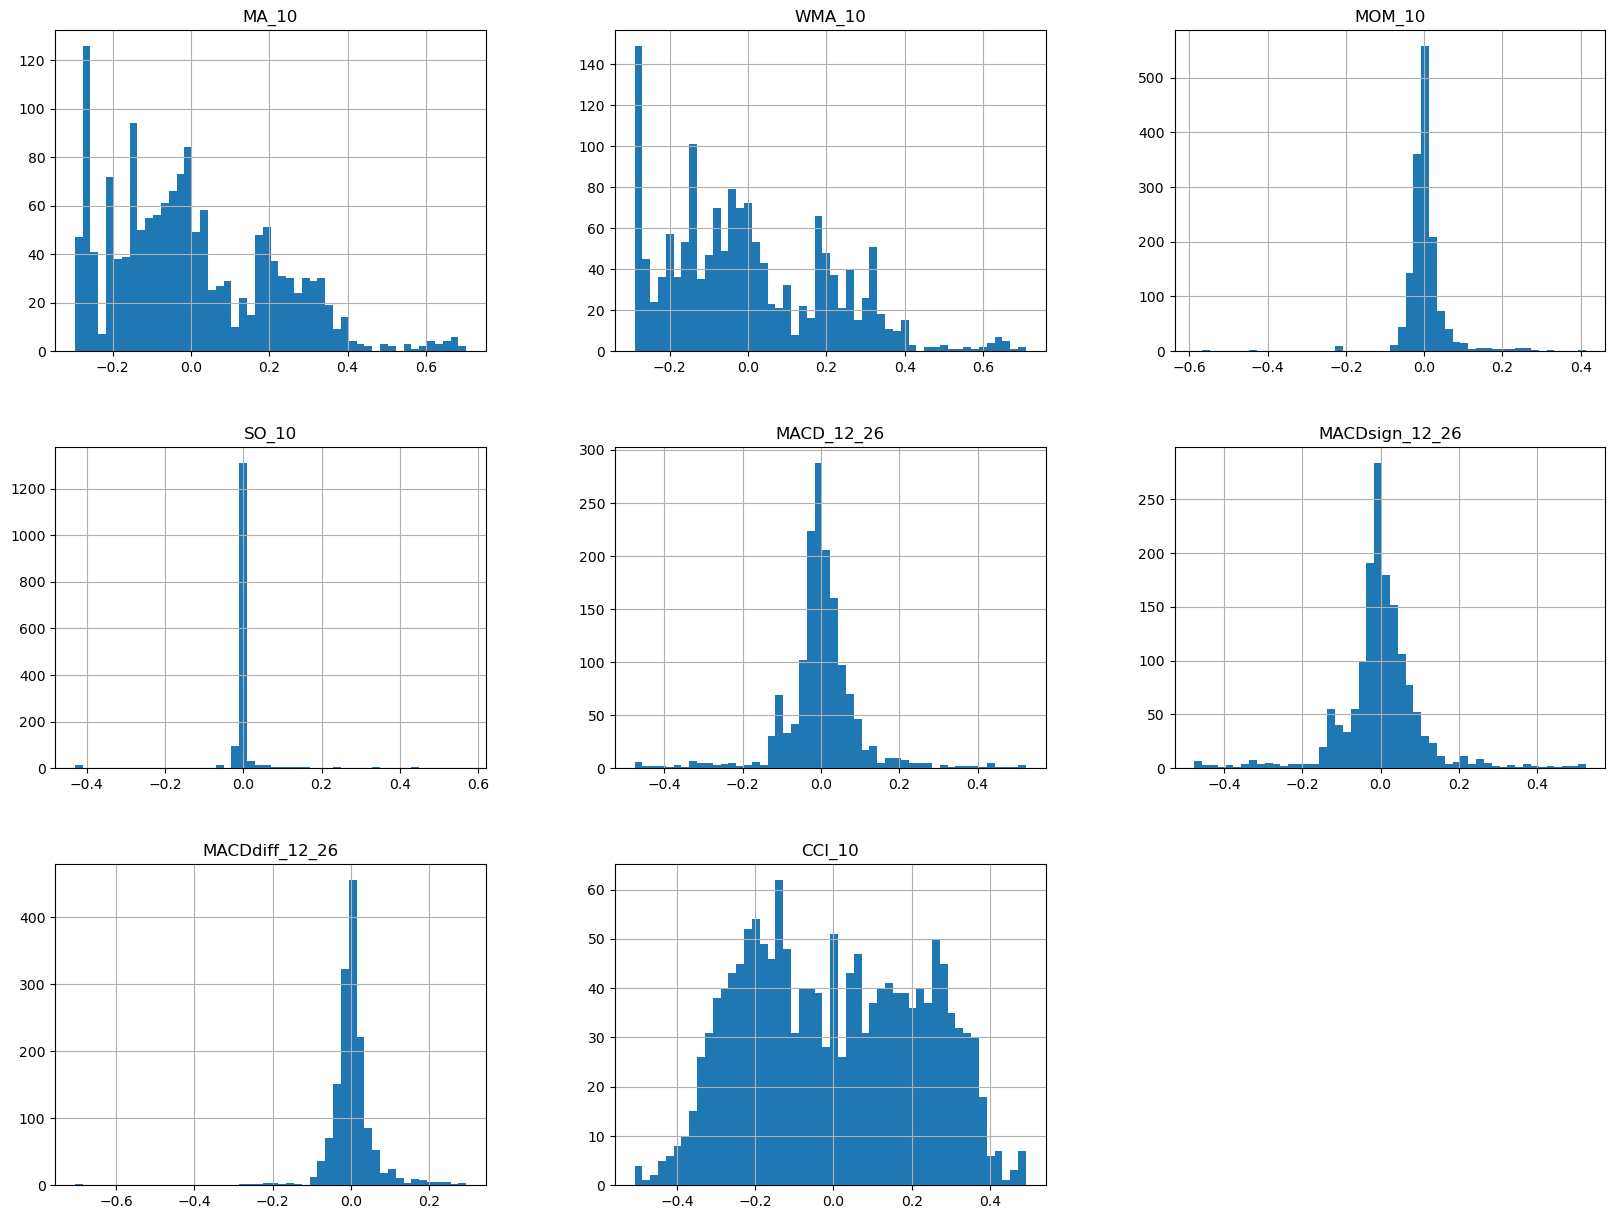

In [123]:
X.hist(bins=50,figsize=(20,15))

In [124]:
#Splitting data into training and test set
#from sklearn.model_selection import train_test_split
total_days = len(X)
hold_days=30
x_train = X[0:(total_days-hold_days)]
y_train = Y[0:(total_days-hold_days)]

In [125]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor(max_depth=10)
Regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [126]:
y_pred = Regressor.predict(X)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(Y,y_pred)
rmse = np.sqrt(mse)
rmse

0.03325245833322897

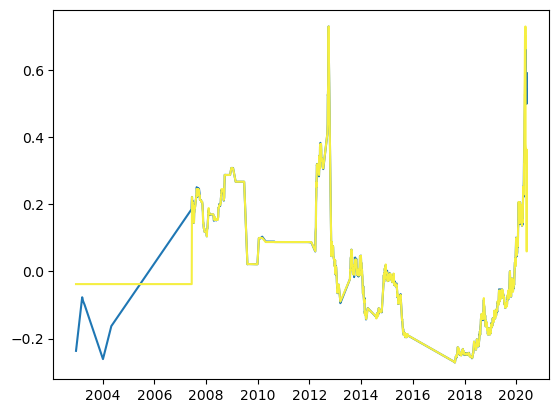

In [127]:
plt.plot(X.index,Y)
plt.plot(X.index, y_pred, c='#f5ef42')
plt.show()

In [128]:
#import necessary libraries
from sklearn.ensemble import BaggingRegressor

In [129]:
regr = BaggingRegressor(base_estimator=Regressor,
n_estimators=50, random_state=0)
regr.fit(x_train,y_train)

C:\Users\win-10\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                 n_estimators=50, random_state=0)

In [130]:
y_pred_br = regr.predict(X)

In [131]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(Y,y_pred_br)
rmse = np.sqrt(mse)
rmse

0.029467592687735855

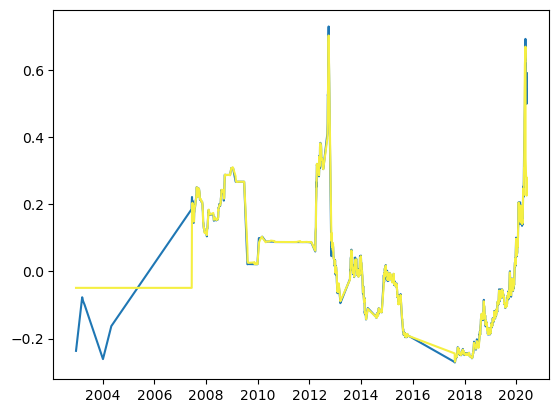

In [132]:
plt.plot(X.index,Y)
plt.plot(X.index, y_pred_br, c='#f5ef42')
plt.show()

In [133]:
#importing the libraries
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50,max_depth=10,random_state=1)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=1)

In [134]:
y_pred_rf = rf.predict(X)

In [72]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(Y,y_pred_rf)
rmse = np.sqrt(mse)
rmse

0.028972856488625482

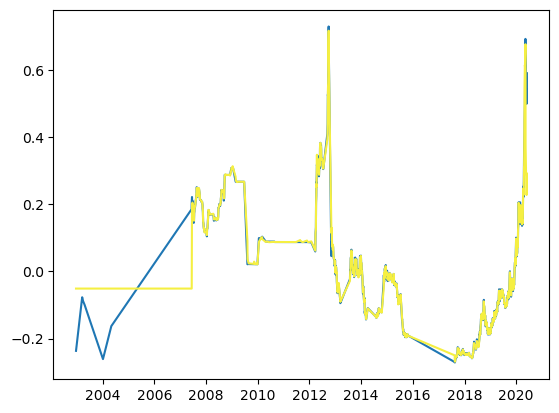

In [73]:
plt.plot(X.index,Y)
plt.plot(X.index, y_pred_rf, c='#f5ef42')
plt.show()

In [74]:
#importing necessary libraries
from sklearn.ensemble import AdaBoostRegressor
adb_reg = AdaBoostRegressor(base_estimator=Regressor,n_estimators=100,learning_rate=0.1)
adb_reg.fit(x_train,y_train)

C:\Users\win-10\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.1, n_estimators=100)

In [75]:
y_pred_adb = adb_reg.predict(X)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(Y,y_pred_adb)
rmse = np.sqrt(mse)
rmse

0.024173095149505486

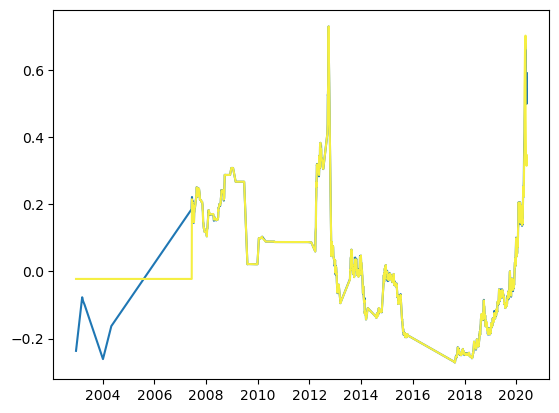

In [76]:
plt.plot(X.index,Y)
plt.plot(X.index, y_pred_adb, c='#f5ef42')
plt.show()

In [77]:
#importing necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
gdbt = GradientBoostingRegressor(max_depth=10,learning_rate=0.1,n_estimators=50,random_state=1)
gdbt.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=50, random_state=1)

In [78]:
y_pred_gdbt = gdbt.predict(X)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(Y,y_pred_gdbt)
rmse = np.sqrt(mse)
rmse

0.02901247502208135

In [79]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix 

In [80]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [81]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train_scaled = sc.fit_transform(x_train)

In [82]:
X_train, Y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [83]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [84]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 15, batch_size = 32)

Epoch 1/15
48/48 [==============================] - 6s 14ms/step - loss: 0.0115
Epoch 2/15
48/48 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 3/15
48/48 [==============================] - 1s 13ms/step - loss: 0.0013
Epoch 4/15
48/48 [==============================] - 1s 14ms/step - loss: 0.0013
Epoch 5/15
48/48 [==============================] - 1s 14ms/step - loss: 0.0013
Epoch 6/15
48/48 [==============================] - 1s 13ms/step - loss: 0.0014
Epoch 7/15
48/48 [==============================] - 1s 13ms/step - loss: 0.0014
Epoch 8/15
48/48 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 9/15
48/48 [==============================] - 1s 13ms/step - loss: 0.0014
Epoch 10/15
48/48 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 11/15
48/48 [==============================] - 1s 13ms/step - loss: 0.0020
Epoch 12/15
48/48 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 13/15
48/48 [==================

In [85]:
X_test = np.array(X)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)

48/48 [==============================] - 1s 6ms/step


In [86]:
real_stock_price = np.asarray(Y)
# real_stock_price=real_stock_price.reshape(1167,1)

In [87]:
predicted_stock_price

array([[-0.00077872],
       [-0.00077872],
       [-0.00077872],
       ...,
       [ 0.47079256],
       [ 0.48446068],
       [ 0.50073177]], dtype=float32)

In [88]:
real_stock_price

array([-0.2366285 , -0.07702791, -0.08848642, ...,  0.5346925 ,
        0.57017294,  0.5896524 ])

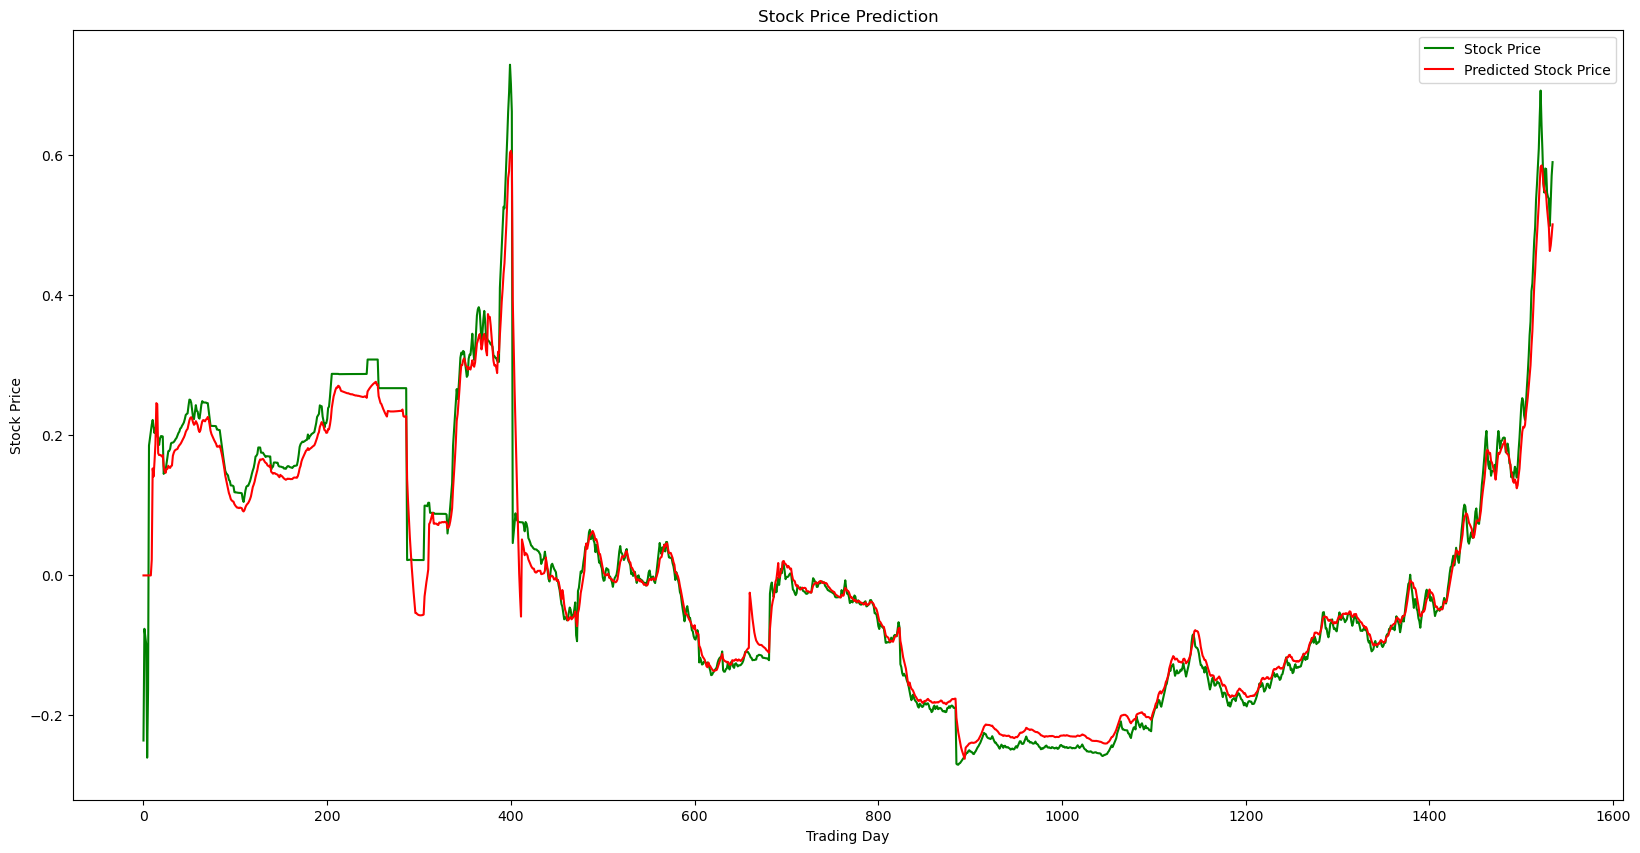

In [89]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [90]:
from sklearn.metrics import mean_squared_error as MSE
rmse = MSE(real_stock_price,predicted_stock_price)**(1/2)
rmse

0.030678911058950153